In [148]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt

N = 150
x = 6*np.random.rand(N,1) - 3
y = 0.3 * x**3 - 0.5 * x**2 + x + 2 + np.random.randn(N,1)


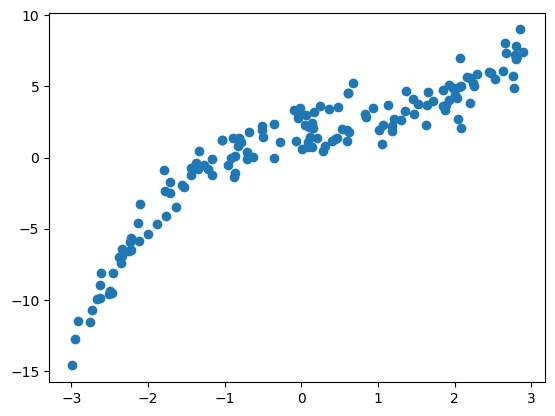

In [149]:
plt.plot(x,y, 'o')

In [150]:
def polinomial_regression(degree, x, y):
    l = []
    a_arr = []
    y_r = []

    #A
    #Lines
    for i in range(degree + 1):
        #Rows
        l = []
        for j in range(degree + 1):
            if i == 0 and j == 0:
                l.append(N)
            else:
                l.append(sum(x**(i+j))[0])
        a_arr.append(l)

    a = np.matrix(a_arr)
    a_1 = np.matrix.getI(a)

    #Y
    for i in range(degree + 1):
        y_r.append([sum(y*x**i)[0]])

    w_matrix = np.matmul(a_1, y_r)

    return w_matrix   

In [151]:
def calculate_poli(x_data, w):
    x = np.arange(min(x_data),(max(x_data)),0.25)
    y = 0
    for i in range(len(w)):
        y += w[i][0] * x**i

    return x, y

In [152]:
def mse(degree, x, y, w):
    n = len(x)

    y_regression = 0
    for i in range(len(w)):
        y_regression += w[i][0] * x**i

    s = np.sum((y - y_regression)**2)

    return s/n

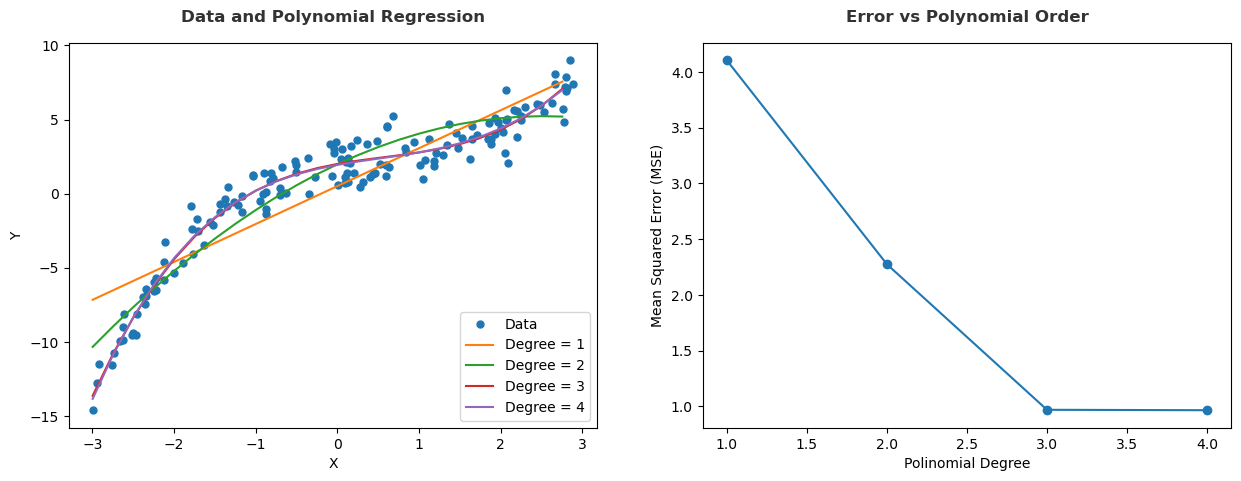

In [155]:
degree = 5

fig, (ax1, ax2) = plt.subplots(1, 2)

fig.set_figwidth(15)
fig.set_figheight(5)

ax1.plot(x,y, 'o', markersize=5, label='Data')

error = []
error_x = []

for i in range(1,degree):
    pol = polinomial_regression(i, x, y)

    w_pol = np.array(pol)

    x_pol , y_pol = calculate_poli(x, w_pol)

    error.append(mse(i, x, y, w_pol))
    error_x.append(i)

    s = 'Degree = '+str(i)
    ax1.plot(x_pol, y_pol, label=s)


ax2.plot(error_x, error, '-o')

ax1.set(xlabel='X', ylabel='Y')
ax1.set_title('Data and Polynomial Regression',
          pad=15, color='#333333', weight='bold')
ax1.legend(loc='lower right')

ax2.set(xlabel='Polinomial Degree', ylabel='Mean Squared Error (MSE)')
ax2.set_title('Error vs Polynomial Order',
          pad=15, color='#333333', weight='bold');